<a href="https://colab.research.google.com/github/KsiuTretyakova/MachineLearningPRO/blob/main/Transformer(MLPro).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Токенізація

In [ ]:
text = "Я люблю програмування та я люблю досліджувати природу"
tokens = text.split()
print(tokens)

['Я', 'люблю', 'програмування', 'та', 'я', 'люблю', 'досліджувати', 'природу']


In [ ]:
vocab = {}
ids = []
next_id = 0
for t in tokens:
  if t not in vocab:
    vocab[t] = next_id
    next_id += 1
  ids.append(vocab[t])

print("Tokens:", tokens)
print("Vocab:", vocab)
print("IDs:", ids)

Tokens: ['Я', 'люблю', 'програмування', 'та', 'я', 'люблю', 'досліджувати', 'природу']
Vocab: {'Я': 0, 'люблю': 1, 'програмування': 2, 'та': 3, 'я': 4, 'досліджувати': 5, 'природу': 6}
IDs: [0, 1, 2, 3, 4, 1, 5, 6]


#Ембідінг

In [ ]:
import numpy as np

emb = {
    'кіт': np.array([0.9, 0.1, 0.0]),
    'собака': np.array([0.85, 0.15, 0.0]),
    'машина': np.array([0.0, 0.2, 0.9])
}

def cosine_sim(a, b):
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)) # cos(γ)

print('Схожість "кіт" та "собака":', round(cosine_sim(emb['кіт'], emb['собака']), 3))
print('Схожість "кіт" та "машина":', round(cosine_sim(emb['кіт'], emb['машина']), 3))

Схожість "кіт" та "собака": 0.998
Схожість "кіт" та "машина": 0.024


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

words = list(emb.keys())
vectors = np.array(list(emb.values()))

print("words",words)
print("list(emb.values())", list(emb.values()))
print("vectors", vectors)

words ['кіт', 'собака', 'машина']
list(emb.values()) [array([0.9, 0.1, 0. ]), array([0.85, 0.15, 0.  ]), array([0. , 0.2, 0.9])]
vectors [[0.9  0.1  0.  ]
 [0.85 0.15 0.  ]
 [0.   0.2  0.9 ]]


In [ ]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

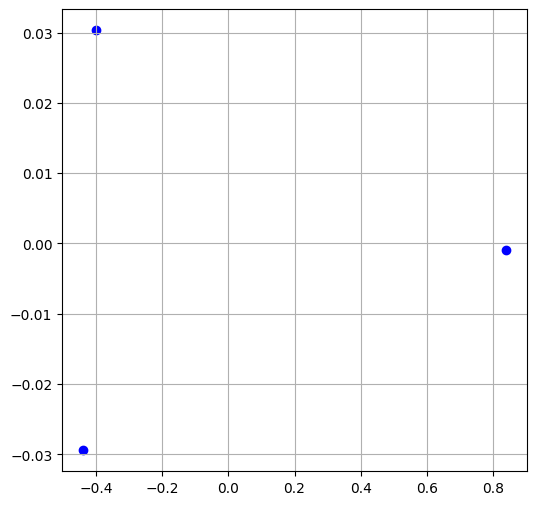

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], color="blue")

#ДЗ підписати назву графіку, мітки осей та спробувати підписати кожну точку (plt.text())

plt.grid(True)
plt.show()

#Attention - обробка слів, які важливі, які ні

In [ ]:
import numpy as np

X = np.array([
  [1.0, 0.0, 0.5, 0.0], # токен A
  [0.0, 1.0, 0.0, 0.5], # токен B
  [1.0, 1.0, 0.0, 0.0], # токен C
])

print("Start (X):\n", np.round(X, 3))

np.random.seed(1)
Wq = np.random.randn(4, 4) * 0.1
Wk = np.random.randn(4, 4) * 0.1
Wv = np.random.randn(4, 4) * 0.1

Q = X.dot(Wq)
K = X.dot(Wk)
V = X.dot(Wv)

# print(Q.shape)
d_k = Q.shape[-1]
score = Q.dot(K.T) / np.sqrt(d_k)

def softmax(x):
  e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
  return e_x / e_x.sum(axis=-1, keepdims=True)

weights = softmax(score)

attn_output = weights.dot(V)

# score - показує "сирі" співпадіння між запитами і ключами (можуть бути різними)
print("Score (Q.dot(K.T) / np.sqrt(d_k)):\n", np.round(score, 3))

# weights - нормалізовані значення (сума по рядку = 1) - це скільки уваги "дається" кожному слову
print("Attention weight (after softmax)\n", np.round(weights, 3))

# attn_output - нове представлення токенів, яке враховує інші слова
print("Attention output (shape {})\n".format(attn_output.shape), np.round(attn_output, 3))

# f"qwerty {n}"
# "qwerty {}".format(n)

Start (X):
 [[1.  0.  0.5 0. ]
 [0.  1.  0.  0.5]
 [1.  1.  0.  0. ]]
Score (Q.dot(K.T) / np.sqrt(d_k)):
 [[ 0.006 -0.019 -0.023]
 [ 0.015 -0.017 -0.004]
 [ 0.02  -0.035 -0.024]]
Attention weight (after softmax)
 [[0.339 0.331 0.33 ]
 [0.339 0.328 0.333]
 [0.344 0.326 0.33 ]]
Attention output (shape (3, 4))
 [[-0.122 -0.067  0.055  0.112]
 [-0.122 -0.067  0.055  0.111]
 [-0.122 -0.067  0.054  0.111]]


# Transformer

Структура Transformer:


Вхідні слова (після токенізації) -> Ембединг (переводить слова в числа - вектори) -> *БАГАТО ШАРІВ* Self-Attention (визначає, які слова важливі одне для одного) -> Нормалізація (допомагає навчитися стабільно) -> Feed Forward (уточнює результати) -> Вихід (наступне слово / відповідь)

Self-Attention - увага до себе!

Кожне слово "дивиться" на інші слова в реченні.

Q - що я шукаю

K - що в мені є

V - зміст слова

Приклад:  
"Кіт сидить на килимі."  
Слово "Кіт" звертає увагу на слово "сидить" (бо це дієслово, що стосується кота), але не дуже - на "килимі".

In [ ]:
import numpy as np

words = ["кіт", "сидить", "килимі"]

X = np.array([
    [1.0, 0.0, 0.5],  #Кіт
    [0.9, 0.1, 0.3],  # сидить
    [0.2, 0.9, 0.0]  # килимі
])

# np.random.seed(42)
Wq = np.random.randn(3, 3) * 0.1
Wk = np.random.randn(3, 3) * 0.1
Wv = np.random.randn(3, 3) * 0.1

Q = X @ Wq  # X.dot(Wq)
K = X @ Wk  # X.dot(Wk)
V = X @ Wv  # X.dot(Wv)

# print(X.dot(Wq))
# print(X @ Wq)

# Homework
scores = Q @ K.T / np.sqrt(K.shape[-1])
weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
attention_output = weights @ V


print("Матриця уваги:\n", np.round(weights, 2))
print("Результат після уваги:\n", np.round(attention_output, 2))

Матриця уваги:
 [[0.33 0.33 0.33]
 [0.33 0.33 0.33]
 [0.33 0.33 0.33]]
Результат після уваги:
 [[0.04 0.08 0.14]
 [0.04 0.08 0.14]
 [0.04 0.08 0.14]]


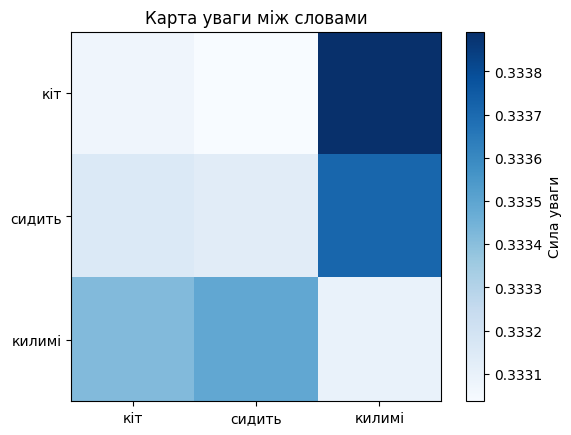

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(weights, cmap="Blues")  # vmin=-1, vmax=1
plt.xticks(ticks=range(3), labels=words)
plt.yticks(ticks=range(3), labels=words)
plt.colorbar(label="Сила уваги")
plt.title("Карта уваги між словами")
plt.show()

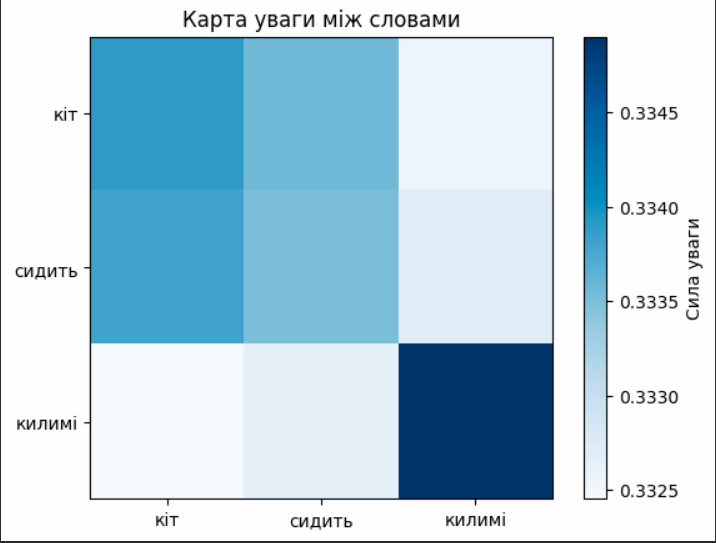

# Проєкт "Шкільний помічник пошуку"

In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# база знань
texts = [
    "Сонце - це зоря, яка знаходиться в ценрі нашої Сонячної системи.",
    "Кисень необхідний для дихання живих організмів.",
    "Вода замерзає при температурі в 0 градусів Цельсія",
    "Теорема Піфагора використовується для прямокутних трикутників.",
    "Тараз Шевченко - відомий український поет і художник.",
    "Дерева виробляють кисень, яким ми дихаємо.",
    "Амазонка є найдовшою та найповноводнішою річкою світу.",
    "Коралові рифи створюються з колоній дрібних морських тварин.",
    "Соняшник обертається за рухом сонця протягом дня.",
    "Полярні ведмеді мають чорну шкіру під білим хутром.",
    "Бджоли відіграють важливу роль у запиленні рослин.",
    "У пустелі Сахара вдень температура може перевищувати 50 градусів.",
    "Дельфіни здатні спати, залишаючи одне око відкритим.",
    "Гори займають близько чверті поверхні Землі.",
    "Райдуга виникає, коли сонячне світло заломлюється у краплях дощу."
]

Ембідінг: створюємо модель для перетворення тексту в числа

In [ ]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings = model.encode(texts, convert_to_tensor=True)
print("Кількість речень:", len(texts))
print("Розмір векторів:", embeddings.shape)

Кількість речень: 15
Розмір векторів: torch.Size([15, 384])


In [ ]:
print(embeddings)

tensor([[ 0.0729,  0.3366,  0.0452,  ..., -0.3677, -0.2964,  0.0479],
        [-0.1071,  0.3267, -0.1032,  ...,  0.0195,  0.0757,  0.0507],
        [-0.2313,  0.2721,  0.1937,  ..., -0.2226, -0.2895,  0.2334],
        ...,
        [-0.0014, -0.3931,  0.2118,  ...,  0.1334,  0.5379, -0.0972],
        [-0.0406, -0.1506,  0.1846,  ..., -0.0361,  0.0024, -0.2640],
        [ 0.0748,  0.0917,  0.1567,  ...,  0.0067,  0.1485,  0.1404]])


In [ ]:
query = input("Введіть своє питання: ")
query_embedding = model.encode(query, convert_to_tensor=True)

Введіть своє питання: Що таке Сонце?


In [ ]:
cosine_scores = util.cos_sim(query_embedding, embeddings)[0]
print(consine_scores)

tensor([ 0.8110,  0.0758,  0.1381,  0.0661, -0.0246,  0.1523, -0.0183,  0.0567,
         0.7289,  0.1188,  0.2068,  0.3367,  0.2719,  0.1703,  0.4515])


In [ ]:
best_match_idx = np.argmax(consine_scores)

print(f"Краща відповідь на питання '{query}':")
print(texts[best_match_idx])

Краща відповідь на питання 'Що таке Сонце?':
Сонце - це зоря, яка знаходиться в ценрі нашої Сонячної системи.


In [ ]:
for i, score in enumerate(cosine_scores):
    print(f"{texts[i]} — схожість: {score:.2f}")

Сонце - це зоря, яка знаходиться в ценрі нашої Сонячної системи. — схожість: 0.81
Кисень необхідний для дихання живих організмів. — схожість: 0.08
Вода замерзає при температурі в 0 градусів Цельсія — схожість: 0.14
Теорема Піфагора використовується для прямокутних трикутників. — схожість: 0.07
Тараз Шевченко - відомий український поет і художник. — схожість: -0.02
Дерева виробляють кисень, яким ми дихаємо. — схожість: 0.15
Амазонка є найдовшою та найповноводнішою річкою світу. — схожість: -0.02
Коралові рифи створюються з колоній дрібних морських тварин. — схожість: 0.06
Соняшник обертається за рухом сонця протягом дня. — схожість: 0.73
Полярні ведмеді мають чорну шкіру під білим хутром. — схожість: 0.12
Бджоли відіграють важливу роль у запиленні рослин. — схожість: 0.21
У пустелі Сахара вдень температура може перевищувати 50 градусів. — схожість: 0.34
Дельфіни здатні спати, залишаючи одне око відкритим. — схожість: 0.27
Гори займають близько чверті поверхні Землі. — схожість: 0.17
Рай